[목표]
- 500명의 키와 몸무게, 비만도 라벨을 이용하여 비만을 판단하는 모델을 만들어보자 
- 머신러닝 전체 과정의 흐름을 이해하자 

# 문제정의
- 머신러닝을 통해서 어떤 문제를 해결할 것인가?
- 지도 vs 비지도 vs 강화 
- 지도 : 분류 vs 회귀 
- 비만을 판단하는 모델을 만들자 
- 비만을 판단하는 모델을 만들자 --> 지도학습 - 분류 

# 데이터 수집
- csv 파일로 이루어진 데이터 수집 
- 500명의 성별, 키, 몸무게, 비만도 등급 

In [1]:
# 데이터 꺼내오기 
import pandas as pd 
bmi = pd.read_csv('./Data/bmi_500.csv')


# 데이터 전처리
- 1.결측치 처리 : 비어있는 데이터를 채워주기 
- 2.이상치 처리 : 정상적인 범위를 벗어난 데이터 수정하기 

## 결측지 확인 
- 데이터프레임의 형태를 갖춘후 Info()함수 사용 

In [2]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


## 이상치 확인
- 데이터프레임의 형태를 갖춘후 describe()함수 사용 
- describe() 수치형 데이터만 분석가능, 기술통계

In [3]:
bmi.describe()
# count : 데이터 수 
# mean : 평균값
# std : 표준편차 
# min : 최솟값 
# 25% : 1분위 수
# 50% : 중앙값 
# 75% : 3분위 수 
# max : 최댓값

# 1.min, max 확인하기
# 2.평균(mean), 중앙값(50%) 확인하기 -> 두 수치가 비슷한지 확인
# 3.두 수치(평균, 중앙값)가 비슷하지 않을경우 : min~max까지 5개의 간격을확인하기 -> 각 국간의 데이터가 고르게 분포가 되어있느지 확인

# 우리의 데이터는 정상적인 데이터로 판단이 됨 

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 탐색적 데이터 분석(EDA)
- 데이터를 자세하게 살펴보자 
- 비만도별로 데이터를 잘 나뉘어져있는지 확인

## 비만도 등급 확인


In [4]:
# 중복된 값은 제거하고 확인 - unique()
bmi["Label"].unique()

#'Obesity' : 비만
#'Normal'  : 정상
#'Overweight' : 과체중
#'Extreme Obesity' : 고도비만
#'Weak' : 저체중
#'Extremely Weak' : 극심한 저체중 

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

## Label이 Weak인 사람들만 추려보기 

In [5]:
# 불리언 인덱싱 
# bmi[bmi["Label"] == "Weak"] #일반적인 불리언 인덱싱 

bol = bmi["Label"] == "Weak" # 불리언 인덱싱 결과를 사용하기 위해 변수에 저장 
data = bmi.loc[bol] # 라벨이 Weak인 전체 행에 대한 데이터를 가져옴 



## Weak인 사람들을 그래프로 그려보기 
- 산점도 

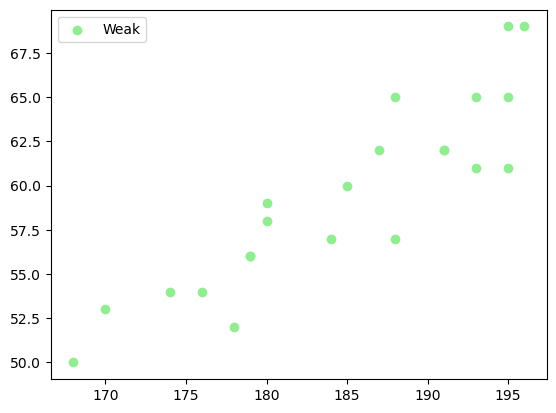

In [6]:
# 그래프 그려주는 도구 꺼내오기 
import matplotlib.pyplot as plt 

# plt.scatter(x, y) # X축 = 키 , y축 = 몸무게 
plt.scatter(data['Height'],data['Weight'],
           color = 'lightgreen', label = "Weak")

plt.legend() # 그래프에 범례(label) 표시
plt.show()

## OverWeight 그래프 그리기 

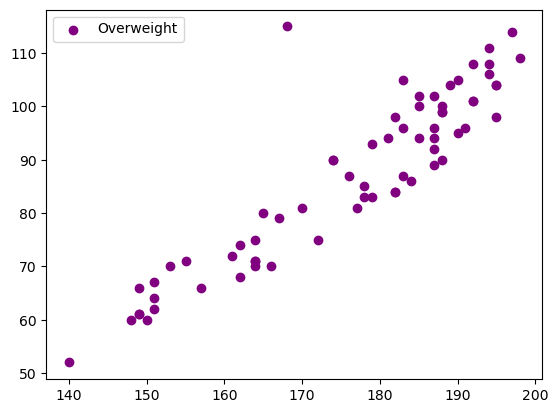

In [7]:
over = bmi["Label"] == "Overweight"
data2 = bmi.loc[over]

plt.scatter(data2['Height'],data2['Weight'],
           color = 'purple', label = "Overweight")

plt.legend() # 그래프에 범례(label) 표시
plt.show()

## 함수로 만들어서 그래프 그리기 
- 반복되는 부분을 함수로 간략화 

In [8]:
def myScatter(label, color):
    over = bmi["Label"] == label
    data2 = bmi.loc[over]
    plt.scatter(data2['Height'],data2['Weight'],
               color = color, label = label)


## 전체 그래프 그리기 

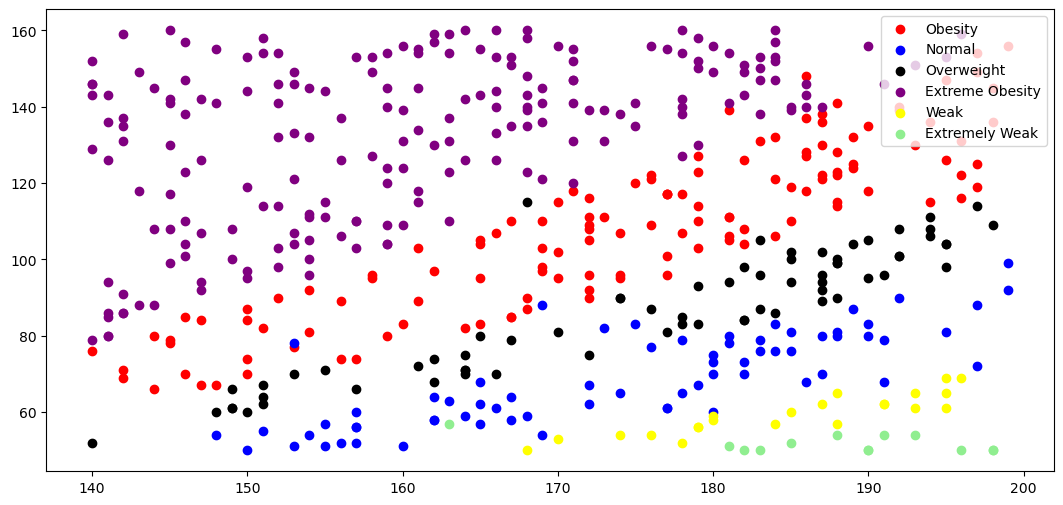

In [9]:
plt.figure(figsize=(13,6))
myScatter('Obesity','red')
myScatter('Normal', 'blue')
myScatter('Overweight', 'black')
myScatter('Extreme Obesity','purple')
myScatter('Weak','yellow')
myScatter('Extremely Weak','lightgreen')
plt.legend()
plt.show()

In [10]:
bmi[bmi["Label"] == "Normal"] # 153정도의 키 , 78정도의 몸무게 정보 찾기 
h_153 = bmi[bmi["Height"] == 153] 
#231	Female	153	78	Normal -> Obesity로 변경

In [11]:
# 키가 153이고 몸무게가 78인 여성을 Normal로 잘못 표기된 것을 Obesity로 수정 
bmi.loc[231, 'Label'] = 'Obesity'

In [12]:
bmi.loc[bmi['Weight']==78]

,Gender,Height,Weight,Label
165,Male,181,78,Normal
231,Female,153,78,Obesity
234,Male,145,78,Obesity


# 모델 선택 및 하이퍼파라미터 정의(튜닝)
- 머신러닝의 모델 불러와서 사용하는 단계 


## 모델 불러오기 
- KNN 모델

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4) # 기본값

## 문제데이터와 정답데이터로 분리 

In [14]:
# 문제 : Height, Weight
X = bmi.loc[:,"Height":"Weight"]
# 정답 : 
y = bmi["Label"] 
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

## 학습을 위해 훈련용(train)과 평가용(test)로 분리 
- 훈련 : 평가 = 7:3 

In [15]:
X_train = X.iloc[:350] # 0~349 훈련용 문제 
X_test = X.iloc[350:] # 350 ~ 499 평가용 문제
y_train = y.iloc[:350] # 0~349 테스트용 문제 
y_test = y.iloc[350:] # 350 ~ 499 테스트용 문제



In [16]:
print("훈련용 문제 :",X_train.shape)
print("검증용 문제 :",X_test.shape)
print("훈련용 정답 :",y_train.shape)
print("검증용 정답 :",y_test.shape)

훈련용 문제 : (350, 2)
검증용 문제 : (150, 2)
훈련용 정답 : (350,)
검증용 정답 : (150,)


# 학습 

In [23]:
# fit(문제, 정답)
knn_model.fit(X_train, y_train)
# X 데이터(키, 몸무게)를 통해서 y 데이터(비만도 등급)의 규칙을 찾음 

KNeighborsClassifier(n_neighbors=4)

# 평가
- 모델이 제대로 만들어졌는지 평가
- 새로운 데이터 (평가용으로 남겨둔 데이터)에 대해서 잘 예측하는지 확인 

In [18]:
import warnings
warnings.filterwarnings('ignore') # warning을 무시하기

In [28]:
# 예측
knn_model.predict([[175,78]])

array(['Normal'], dtype=object)

In [29]:
# 만들어진 모델 평가 -> 학습에 사용하지 않는 새로운 문제와 정답으로 확인 
# score(문제데이터, 정답데이터)
knn_model.score(X_test, y_test)

#정답데이터와 예측정답을 비교
# 0~1 까지 값을 출력
# 0 : 모덱의 성능이 낮다, 규칙이 엉망이다 --> 규칙을 찾지 못함
# 1 : 모델의 성능이 괜찮다, 규칙을 잘 찾음 

0.8933333333333333

In [30]:
# 훈련용 데이터 정확도 확인
knn_model.score(X_train, y_train)

# 규칙을 찾는데 사용된 데이터이기 때문에 test보다는 score 값이 높음 

0.9542857142857143

### 일반적인 상황

- train에 사용한 score가 일반적으로 높음 
- test를 사용한 score가 일반적으로 낮음 --> 정상범주

### 예외인상황

- train에 사용한 score가 낮음 --> 과소적합 <-> 과대적합
- test를 사용한 socre가 높음 --> test는 운으로 잘 맞춤(비정상), 규칙을 잘못 찾음

# 하이퍼파라미터 튜닝하기
- KNN 모델의 하이퍼파라미터(n-neighbors)의 변화 에따라 score값을 확인
- --> 최적의 하이퍼파라미터를 찾기위해 

In [43]:

for i in range(1,11):
    knn_model3 = KNeighborsClassifier(n_neighbors=i) # 기본값
    knn_model3.fit(X_train, y_train)
    print(f'{i}번째 score : {knn_model3.score(X_test, y_test)}')
    

1번째 score : 0.9066666666666666
2번째 score : 0.9
3번째 score : 0.8933333333333333
4번째 score : 0.8933333333333333
5번째 score : 0.9066666666666666
6번째 score : 0.92
7번째 score : 0.9
8번째 score : 0.9133333333333333
9번째 score : 0.92
10번째 score : 0.9333333333333333


## 모델 복잡도 곡선 그려보기 
- 과대적합, 과소적합, 일반화 확인하기 위해


In [57]:
# 훈련용과 평가용 데이터의 점수를 저장 
# 훈련용 데이터 점수 
train_score = []


# 평가용 데이터 점수
test_score = []
for i in range(1,31):
    
    # n_neighbors를 변경해가면서 모델 생성 
    knn_model4 = KNeighborsClassifier(n_neighbors=i) # 기본값
    
    # 생성된 모델 학습 
    knn_model4.fit(X_train, y_train)
    
    # 만들어진 규칙으로 score값 저장
    train_score.append(knn_model4.score(X_train, y_train))
    test_score.append(knn_model4.score(X_test, y_test))

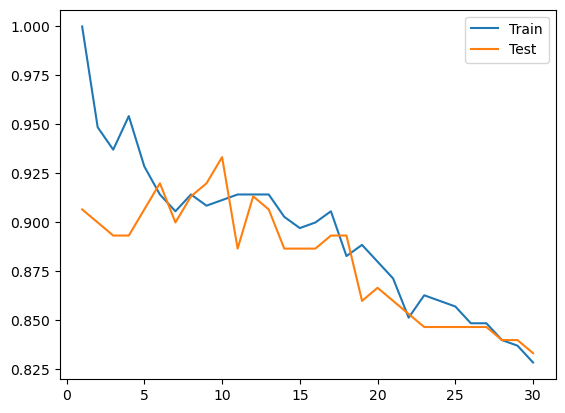

In [58]:
# 그래프로 확인하기 
# 선그래프 : plot(X, y축의 값 필요)
# X축(학습량) : n_neighbors = range(1, 31)
# y축(정확도) : score 

plt.plot(range(1, 31), train_score, label="Train")
plt.plot(range(1, 31), test_score, label="Test")
plt.legend()
plt.show()